# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [2]:
# loading the data:
customers = pd.read_csv('../Wholesale customers data.csv')

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?

1) FRESH: annual spending (m.u.) on fresh products

2) MILK: annual spending (m.u.) on milk products

3) GROCERY: annual spending (m.u.)on grocery products

4) FROZEN: annual spending (m.u.)on frozen products

5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products

6) DELICATESSEN: annual spending (m.u.)on and delicatessen products

7) CHANNEL: customers Channel - Hotel/Restaurant/Cafe (1) or Retail channel (2)

8) REGION: customers Region - Lisnon (1), Oporto (2) or Other (3) 


* Any categorical data to convert?

Channel and Regions have numerical values but are categorical

* Any missing data to remove?

customers.isna().sum() gives no missing data

* Column collinearity - any high correlations?

DETERGENTS_PAPER and GROCERY, I've eliminated the first one


* Descriptive statistics - any outliers to remove?

Yes, I've eliminated outliers with tresholds of 60_000 for fresh, 40000 for the rest

* Column-wise data distribution - is the distribution skewed?

The distributions are skewed to lower values

* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

Attribute Information:

1) FRESH: annual spending (m.u.) on fresh products (Continuous);
2) MILK: annual spending (m.u.) on milk products (Continuous);
3) GROCERY: annual spending (m.u.)on grocery products (Continuous);
4) FROZEN: annual spending (m.u.)on frozen products (Continuous)
5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)
6) DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);
7) CHANNEL: customersâ€™ Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal)
8) REGION: customersâ€™ Region â€“ Lisnon, Oporto or Other (Nominal)
Descriptive Statistics:

(Minimum, Maximum, Mean, Std. Deviation)
FRESH ( 3, 112151, 12000.30, 12647.329)
MILK (55, 73498, 5796.27, 7380.377)
GROCERY (3, 92780, 7951.28, 9503.163)
FROZEN (25, 60869, 3071.93, 4854.673)
DETERGENTS_PAPER (3, 40827, 2881.49, 4767.854)
DELICATESSEN (3, 47943, 1524.87, 2820.106)

REGION Frequency
Lisbon 77
Oporto 47
Other Region 316
Total 440

CHANNEL Frequency
Horeca 298
Retail 142
Total 440



# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [3]:
# Your code here

In [4]:
# Your code here:
print(customers.columns)

customers.isna().sum()

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')


Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [5]:
customers.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


In [6]:
customers2=customers.drop(columns=["Detergents_Paper"])

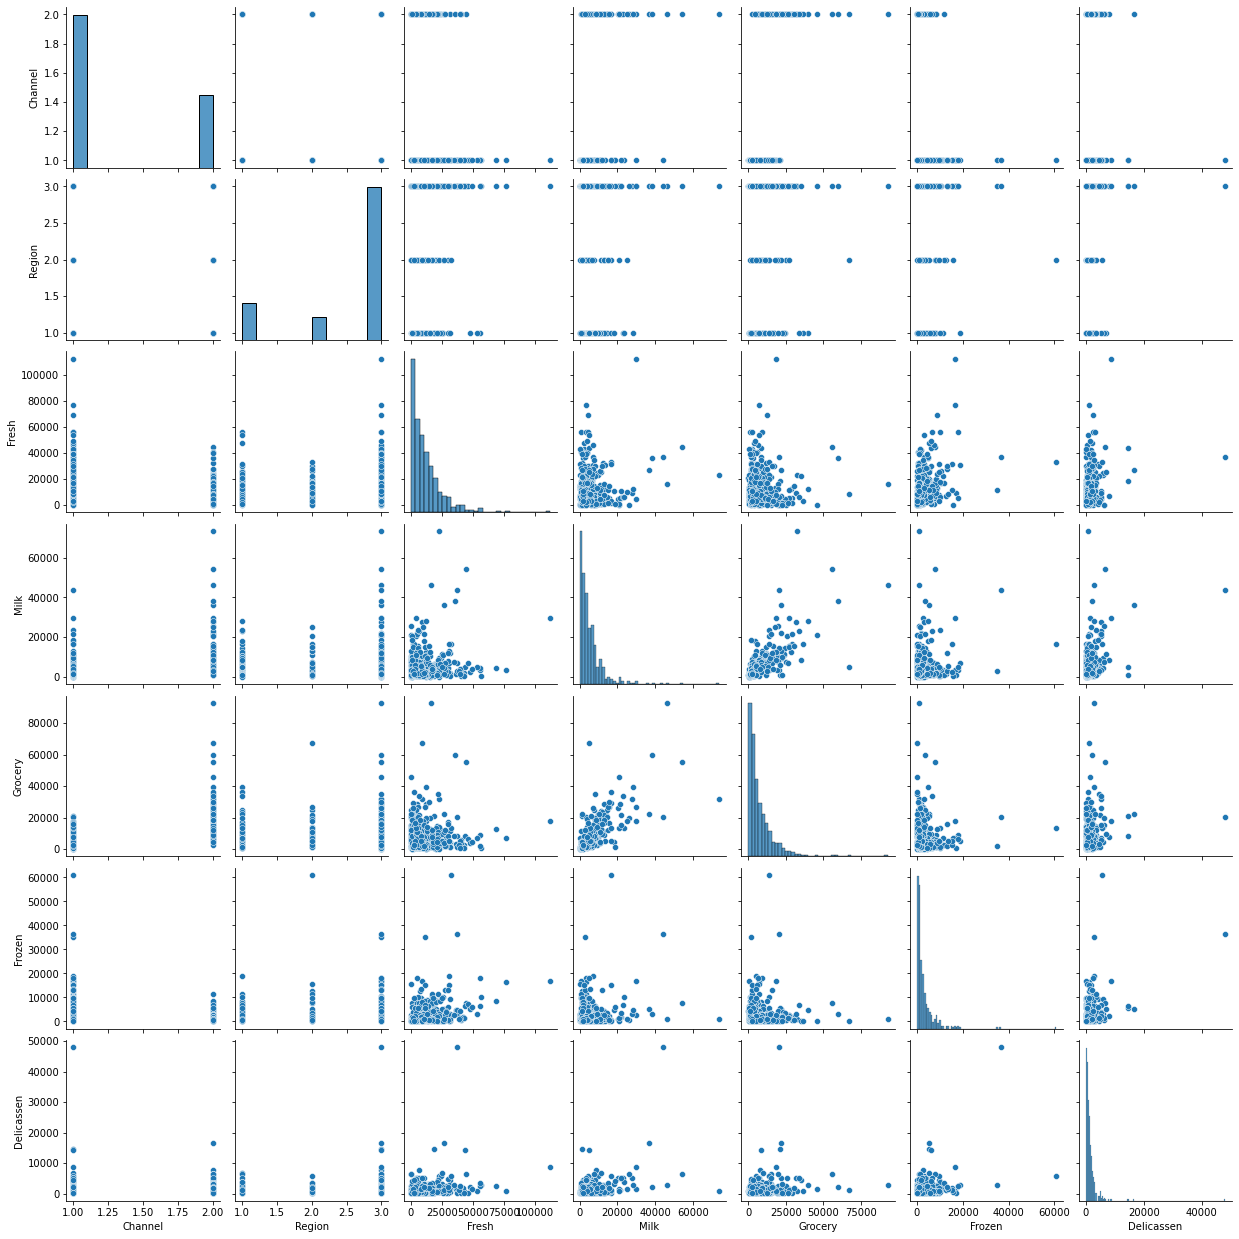

In [7]:
sns.pairplot(customers2);

In [8]:
# Outliers 60_000 for fresh, 40000 for the rest did poor job with DBSCAN
# Outliers 50_000 for fresh, 20000 for the rest did poor job with DBSCAN
print("With outliers: ",customers2.shape[0])
customers2=customers2[customers2["Fresh"] < 60000]
customers=customers[customers["Fresh"] < 60000]
cols = ["Milk","Grocery","Frozen","Delicassen"]
for col in cols:
    customers2 = customers2[customers2[col] < 40000]
    customers = customers[customers[col] < 40000]
    
print("Without outliers: ",customers2.shape[0])

With outliers:  440
Without outliers:  429


# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [9]:

from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(customers2)

cust_scale = scale.transform(customers2)

# Challenge 3 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [10]:
from sklearn.cluster import KMeans

    
kmeans_cust = KMeans( random_state=0).fit(cust_scale) 
customers['labels']=kmeans_cust.labels_

Count the values in `labels`.

In [11]:
# Your code here:
customers['labels'].value_counts()

1    155
7     74
6     73
2     43
0     35
3     32
5     14
4      3
Name: labels, dtype: int64

# Challenge 4 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [12]:

from sklearn.cluster import DBSCAN

clustering_dbscan = DBSCAN(eps=0.5).fit(cust_scale)
customers['labels_DBSCAN']=clustering_dbscan.labels_


Count the values in `labels_DBSCAN`.

In [13]:
# Your code here
customers['labels_DBSCAN'].value_counts()

-1    314
 0    101
 2      9
 1      5
Name: labels_DBSCAN, dtype: int64

# Challenge 5 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

/home/ordovas/anaconda3/envs/ironhack/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


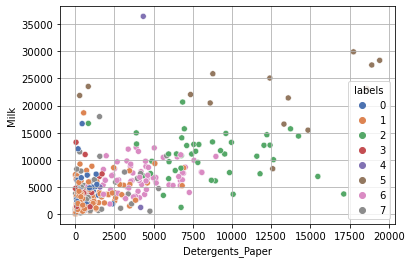

In [35]:
plt.grid()
sns.scatterplot(customers["Detergents_Paper"],customers["Milk"], hue=customers["labels"], palette="deep");

/home/ordovas/anaconda3/envs/ironhack/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


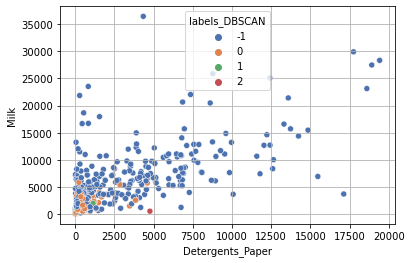

In [36]:
plt.grid()
sns.scatterplot(customers["Detergents_Paper"],customers["Milk"], hue=customers["labels_DBSCAN"], palette="deep");

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

/home/ordovas/anaconda3/envs/ironhack/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


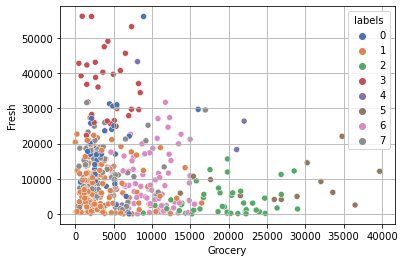

In [37]:
plt.grid()
sns.scatterplot(customers["Grocery"],customers["Fresh"], hue=customers["labels"], palette="deep");


/home/ordovas/anaconda3/envs/ironhack/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


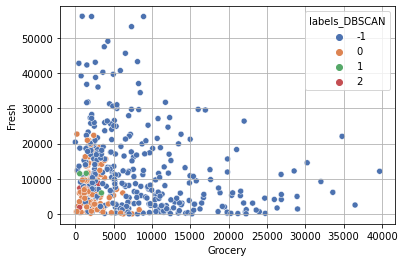

In [38]:
plt.grid()
sns.scatterplot(customers["Grocery"],customers["Fresh"], hue=customers["labels_DBSCAN"], palette="deep");

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

/home/ordovas/anaconda3/envs/ironhack/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


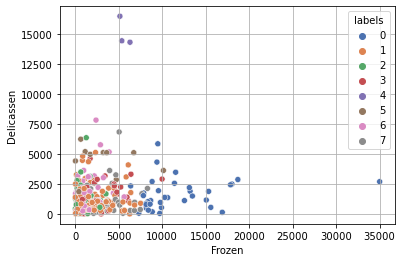

In [40]:
plt.grid()
sns.scatterplot(customers["Frozen"],customers["Delicassen"], hue=customers["labels"], palette="deep");

/home/ordovas/anaconda3/envs/ironhack/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


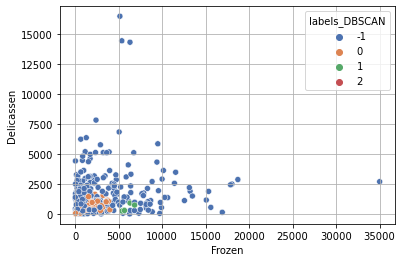

In [42]:
plt.grid()
sns.scatterplot(customers["Frozen"],customers["Delicassen"], hue=customers["labels_DBSCAN"], palette="deep");


Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [43]:
customers.groupby("labels").mean().drop(columns=["labels_DBSCAN"])

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels_DBSCAN
labels,,,,,,,,,
0,1.028571,2.714286,17599.571429,3876.171429,3970.514286,11791.057143,576.142857,1641.371429,-1.000000
1,1.000000,2.987097,7753.774194,2711.612903,3376.722581,1854.716129,801.238710,967.600000,-0.283871
2,2.000000,2.255814,3780.860465,10645.162791,19284.209302,1291.860465,8444.976744,1231.581395,-1.000000
3,1.062500,2.718750,36425.156250,3728.843750,4080.531250,3060.875000,580.062500,1518.937500,-1.000000
4,1.333333,3.000000,29309.666667,14238.000000,17059.333333,5613.000000,3363.000000,15115.333333,-1.000000
5,1.857143,2.357143,7961.642857,22110.857143,26905.000000,2732.357143,11944.500000,3529.785714,-1.000000
6,2.000000,2.917808,9836.780822,6810.780822,9946.438356,1427.328767,4267.356164,1530.273973,-1.000000
7,1.054054,1.229730,10292.554054,3126.567568,4021.918919,2514.905405,957.905405,1014.689189,-0.635135


In [45]:
customers.groupby("labels_DBSCAN").mean().drop(columns=["labels"])

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
labels_DBSCAN,,,,,,,,
-1,1.433121,2.423567,12684.398089,6388.691083,8921.850318,3196.904459,3247.984076,1654.732484
0,1.000000,3.000000,7308.990099,1860.524752,2482.445545,1509.316832,566.623762,644.415842
1,1.000000,3.000000,9150.600000,1859.600000,1607.000000,5972.400000,376.600000,502.800000
2,1.000000,1.000000,6474.000000,1176.666667,1499.444444,1436.111111,754.222222,373.777778


Which algorithm appears to perform better?

In [18]:
# Clearly, the K-means algorithm. It shows different mean values for diferent columns.

# With DBSCAN we might need to change some parameters to perform better

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

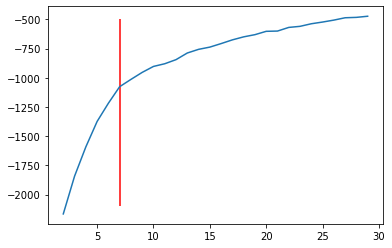

In [64]:

kmeans_customers={}

for i in range(2,30):
    km_f=KMeans(n_clusters=i, random_state=0)
    kmeans_customers[i] ={"function": km_f.fit(cust_scale) ,"scores": km_f.score(cust_scale)}
    
plt.plot(kmeans_customers.keys(), [kmeans_customers[k]["scores"] for k in kmeans_customers.keys()])
plt.vlines(7,-2100,-500,color="red");



In [20]:
# It could be around K=7, where there could be a change of the shape

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

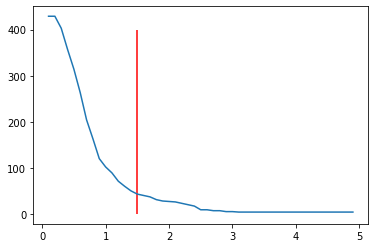

In [72]:
#There is no score here, so I tried to use how many outlier are in the classification, to check
# how well is performing, due to the high ammount of outlier before.

dbscan_customers={}

for i in np.arange(0.1,5,0.1):
    dbscan_f=DBSCAN(eps=i).fit(cust_scale)
    dbscan_customers[i] ={"function": dbscan_f.fit(cust_scale) ,"n_outliers": sum(dbscan_f.labels_ ==-1)}

plt.plot(dbscan_customers.keys(), [dbscan_customers[k]["n_outliers"] for k in dbscan_customers.keys()])
plt.vlines(1.5,0,400,color="red");

# It could be around epsilon=1.5, where there could be a change of the shape

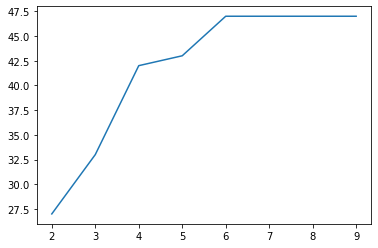

In [78]:
dbscan_customers={}

for i in np.arange(2,10):
    dbscan_f=DBSCAN(eps=1.5,min_samples=i).fit(cust_scale)
    dbscan_customers[i] ={"function": dbscan_f.fit(cust_scale) ,"n_outliers": sum(dbscan_f.labels_ ==-1)}

plt.plot(dbscan_customers.keys(), [dbscan_customers[k]["n_outliers"] for k in dbscan_customers.keys()])
#plt.vlines(1.5,0,400,color="red");

# The higher the min_samples, more outliers are found. This one is not a good proxy.